## Compare ideal nonuniformity
nonuniformity may vary according to particle energy and type, we will investigate these effects here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.interpolate import LinearNDInterpolator
import os
TAO_CALIB_PATH="/dybfs/users/xuhangkun/SimTAO/offline"
Nonuniformity_Path=os.path.join(TAO_CALIB_PATH,"Nonuniformity")

In [2]:
def MeanMap(map_list,radius_cut=650):
    """Calculate the mean of the map

    Args:
        map_list : list of nonuniformity map
    Return:
        mean_map : mean of nonuniformity map in map_list
    """
    xx = np.linspace(0,radius_cut,30)
    yy = np.linspace(1,179,30)
    info = {"x":[],"y":[],"ratio":[]}
    for r in xx:
        for theta in yy:
            ratios = [map(r,theta) for map in map_list]
            ratio = sum(ratios)/len(ratios)
            info["x"].append(r)
            info["y"].append(theta)
            info["ratio"].append(ratio)
    func = LinearNDInterpolator(list(zip(info["x"],info["y"])),info["ratio"])
    return func

def DiffMap(map_1,map_2,radius_cut=650):
    """Calculate the difference betweeb maps

    Args:
        map_1 : first nonuniformity map
        map_2 : second nonuniformity map
    Return:
        diff_map : different of map
    """
    xx = np.linspace(0,radius_cut,30)
    yy = np.linspace(1,179,30)
    info = {"x":[],"y":[],"ratio":[]}
    for r in xx:
        for theta in yy:
            ratio = map_1(r,theta) - map_2(r,theta)
            info["x"].append(r)
            info["y"].append(theta)
            info["ratio"].append(ratio)
    func = LinearNDInterpolator(list(zip(info["x"],info["y"])),info["ratio"])
    return func

def save_fig(func,ralative_path,title="map",radius_cut=650):
    """save fig
    """
    xx = np.linspace(0,radius_cut,30)
    yy = np.linspace(1,179,30)
    xx,yy = np.meshgrid(xx,yy)
    zz = func(xx,yy)
    fig = plt.figure()
    plt.pcolormesh(xx*xx*xx,np.cos(yy*np.pi/180),zz, shading='auto')
    plt.colorbar()
    plt.xlabel("$R^{3} [mm^{3}]$",fontsize=14)
    plt.ylabel("$cos(\\theta)$",fontsize=14)
    plt.title(title,fontsize=16)
    plt.savefig(os.path.join(Nonuniformity_Path,ralative_path))

## Effect of particle energy
we will investigate the effect of energy 

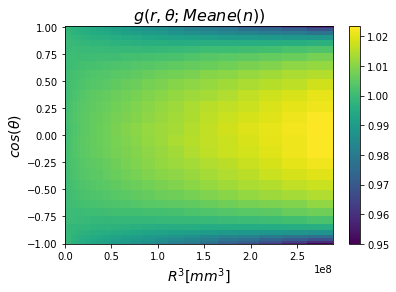

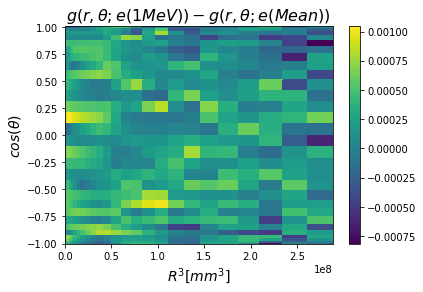

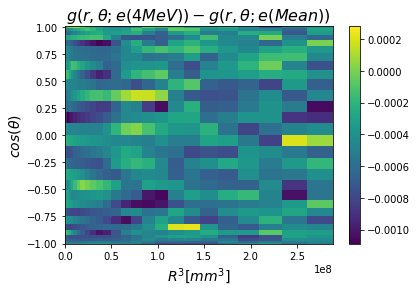

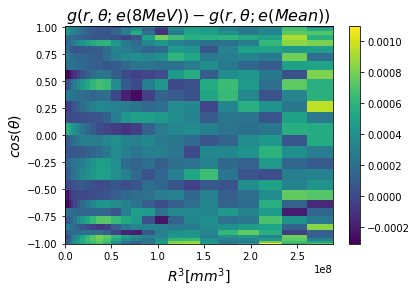

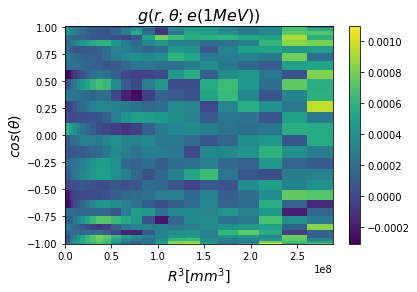

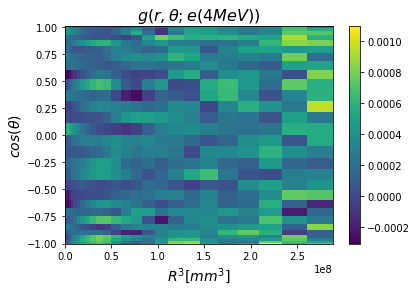

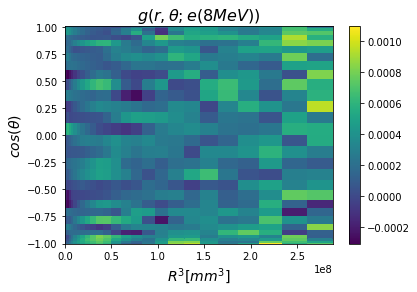

In [9]:
source = "electron"
label = "e"
energy = [1,4,8]
files = [os.path.join(Nonuniformity_Path,"data/map/","ideal_nonuniformity_%s_%sMeV.pkl"%(source,e)) for e in energy]
maps = [pkl.load(open(file,"rb")) for file in files]
mean_map = MeanMap(maps)
diff_maps = [DiffMap(e_m,mean_map) for e_m in maps]
save_fig(mean_map,
        ralative_path="data/paper_fig/compare_ideal_nonuniformity/ideal_mean_%s_nonuniformity.pdf"%(source),
        title="$g(r,\\theta;Mean%s(n)$)"%(label)
        )
# save the difference 
for diff,e in zip(diff_maps,energy):
    save_fig(diff,
          ralative_path="data/paper_fig/compare_ideal_nonuniformity/diff_ideal_%s_%sMeV-mean.pdf"%(source,e),
          title="$g(r,\\theta;%s(%dMeV))- g(r,\\theta;%s(Mean))$"%(label,e,label)
          )
# save the difference 
for map,e in zip(maps,energy):
    save_fig(diff,
          ralative_path="data/paper_fig/compare_ideal_nonuniformity/ideal_%s_%sMeV_nonuniformity.pdf"%(source,e),
          title="$g(r,\\theta;%s(%dMeV))$"%(label,e)
          )

## Effect of particle type


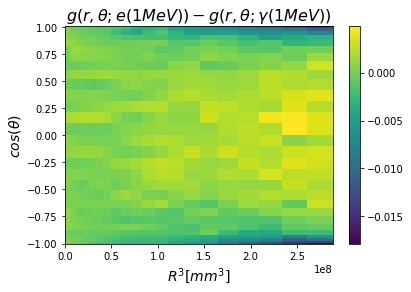

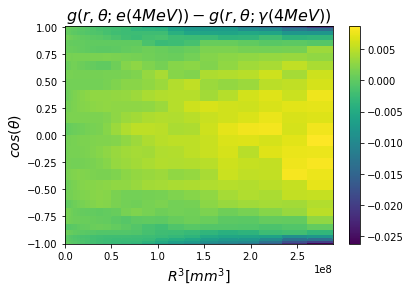

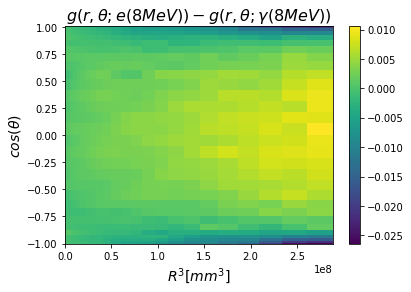

In [8]:
energy = [1,4,8]
files = [os.path.join(Nonuniformity_Path,"data/map/","ideal_nonuniformity_%s_%sMeV.pkl"%("electron",e)) for e in energy]
electron_maps = [pkl.load(open(file,"rb")) for file in files]
files = [os.path.join(Nonuniformity_Path,"data/map/","ideal_nonuniformity_%s_%sMeV.pkl"%("gamma",e)) for e in energy]
gamma_maps = [pkl.load(open(file,"rb")) for file in files]
diff_maps = [DiffMap(e_m,g_m) for e_m,g_m in zip(electron_maps,gamma_maps)]
# save the difference 
for diff,e in zip(diff_maps,energy):
    save_fig(diff,
          ralative_path="data/paper_fig/compare_ideal_nonuniformity/diff_ideal_electron-gamma_%sMeV.pdf"%(e),
          title="$g(r,\\theta;e(%dMeV))- g(r,\\theta;\\gamma(%dMeV))$"%(e,e)
          )